#TASK_1


##Regression discontinuity: banking recovery

In [43]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest



In [2]:
# Load the data
df=pd.read_csv(r"C:\intership\Debt-Recovery-for-Bank-Collection-Using-Regression-Discontinuity\Bank Debt Data\bank_debt_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [6]:
#missing value:
df.isnull().sum()


id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [8]:
#duplicate value 
df.duplicated().sum()

0

In [9]:
#identify garbage value
for i in df.select_dtypes(include="object").columns:
    print( df[i].value_counts() )
    print("***"*10)

recovery_strategy
Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: count, dtype: int64
******************************
sex
Male      973
Female    909
Name: count, dtype: int64
******************************


In [12]:
#discriptive staistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,1882.0,1035.596174,591.458429,6.000,534.2500,1029.500000,1551.750000,2056.00000
expected_recovery_amount,1882.0,2759.967588,2019.826565,194.000,1261.2500,2062.000000,3569.500000,9964.00000
actual_recovery_amount,1882.0,4000.967837,4576.506350,200.425,1045.1903,2115.446373,5417.237207,34398.47971
age,1882.0,39.650372,15.453072,18.000,28.0000,35.000000,50.000000,84.00000


In [13]:
df.describe(include="object")

,recovery_strategy,sex
count,1882,1882
unique,5,2
top,Level 1 Recovery,Male
freq,670,973


In [15]:
# Define threshold (for example $1000)
threshold = 1000

# Create a new variable for distance from the threshold
df['distance_from_threshold'] = df['expected_recovery_amount'] - threshold

# Generate a dummy variable indicating if the customer is above the threshold
df['above_threshold'] = (df['expected_recovery_amount'] >= threshold).astype(int)


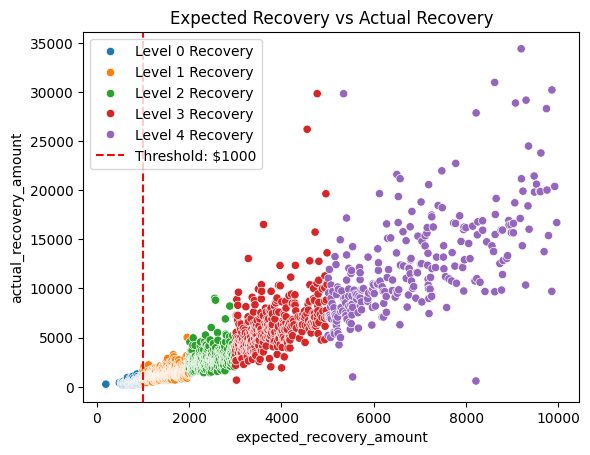

In [18]:
# Visualize the relationship between expected recovery and actual recovery amount
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=df)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: ${threshold}')
plt.legend()
plt.title('Expected Recovery vs Actual Recovery')
plt.show()

In [22]:
# Run the regression discontinuity model
# The model looks for a jump in actual recovery amount at the threshold
rdd_model = smf.ols('actual_recovery_amount ~ distance_from_threshold * above_threshold', data=df).fit()

In [23]:
rdd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.819
Method:                     Least Squares   F-statistic:                     2830.
Date:                    Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                            18:31:28   Log-Likelihood:                -16925.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1878   BIC:                         3.388e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 635.9338    206.945      3.073      0.002     230.067    1041.801
distance_from_threshold                     0.6692      0.944      0.709      0.478      -1.182       2.520
above_threshold                          -394.4978    218.099     -1.809      0.071    -822.240      33.244
distance_from_threshold:above_threshold     1.4191      0.944      1.503      0.133      -0.432       3.271
==============================================================================
Omnibus:                     1473.817   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79669.183
Skew:                           3.200   Prob(JB):                         0.00
Kurtosis:                      34.225   Cond. No.                     2.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Analyze whether the jump exceeds the additional $50 in cost
effect_at_threshold = rdd_model.params['above_threshold']
print(f"Estimated effect of strategy change at threshold: ${effect_at_threshold:.2f}")

if effect_at_threshold > 50:
    print("The jump in recovery amount exceeds the $50 cost, so the extra strategy effort is worth it.")
else:
    print("The jump in recovery amount does NOT exceed the $50 cost, so the extra strategy effort is not worth it.")

Estimated effect of strategy change at threshold: $-394.50
The jump in recovery amount does NOT exceed the $50 cost, so the extra strategy effort is not worth it.


##Graphical exploratory data analysis

In [25]:
# Filter the data for expected recovery amounts between $0 and $2000
filtered_data = df[(df['expected_recovery_amount'] > 0) & (df['expected_recovery_amount'] <= 2000)]


<Axes: xlabel='expected_recovery_amount', ylabel='age'>

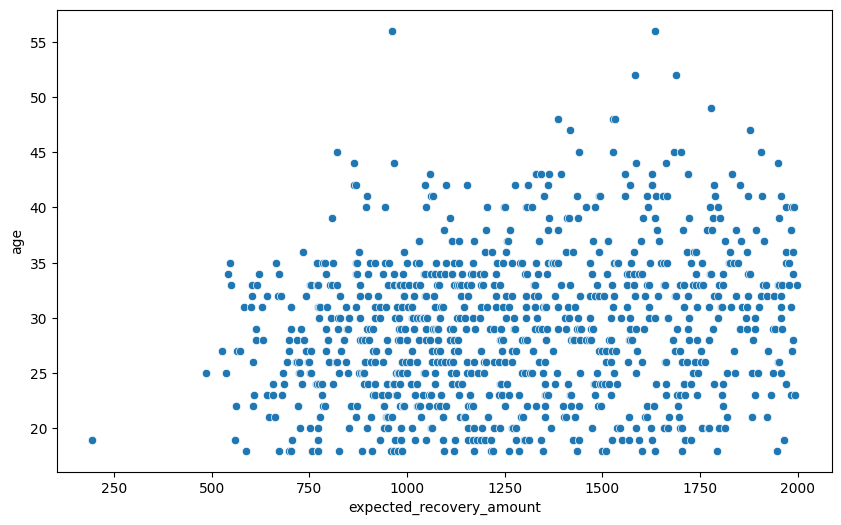

In [26]:
# Create the scatter plot of age vs expected recovery amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=filtered_data)

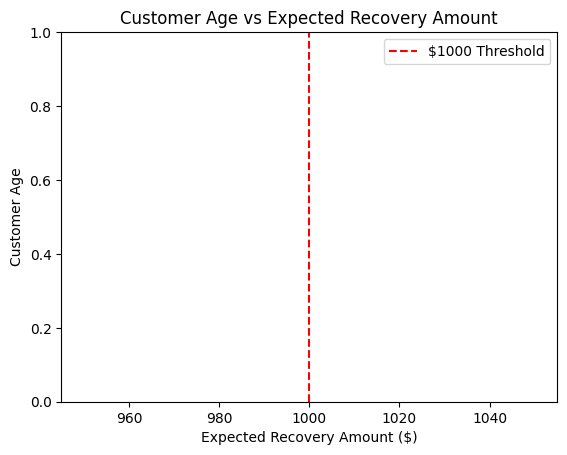

In [29]:
# Mark the threshold at $1000 separating Level 0 and Level 1
plt.axvline(1000, color='red', linestyle='--', label='$1000 Threshold')
plt.title('Customer Age vs Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Customer Age')
plt.legend()

# Show the plot
plt.show()

##Statistical test: age vs. expected recovery amount

In [31]:
# Filter the data for expected recovery amounts between $900 and $1100
filtered_data = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] < 1100)]


In [32]:
# Separate the customers into two groups
group_below_threshold = filtered_data[filtered_data['expected_recovery_amount'] <= 1000]['age']
group_above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]['age']

In [35]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_below_threshold, group_above_threshold)


In [36]:
# Calculate the means for both groups
mean_below = np.mean(group_below_threshold)
mean_above = np.mean(group_above_threshold)

In [37]:
# Print the results
print(f"Mean age of customers below threshold ($900 - $1000): {mean_below:.2f}")
print(f"Mean age of customers above threshold ($1000 - $1100): {mean_above:.2f}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


Mean age of customers below threshold ($900 - $1000): 27.10
Mean age of customers above threshold ($1000 - $1100): 28.76
T-statistic: -1.8039, P-value: 0.0729


In [38]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in age above and below the threshold.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age above and below the threshold.")

Fail to reject the null hypothesis: There is no significant difference in age above and below the threshold.


##Statistical test: sex vs. expected recovery amount

In [40]:
# Filter the data for expected recovery amounts between $900 and $1100
filtered_data = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] < 1100)]

# Separate the customers into two groups
group_below_threshold = filtered_data[filtered_data['expected_recovery_amount'] <= 1000]
group_above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]

In [41]:
# Calculate the number of male customers and the total number of customers for both groups
n_below = len(group_below_threshold)
n_above = len(group_above_threshold)

n_male_below = (group_below_threshold['sex'] == 'male').sum()
n_male_above = (group_above_threshold['sex'] == 'male').sum()


In [45]:
# Perform a proportion test
count = [n_male_below, n_male_above]
nobs = [n_below, n_above]
stat, p_value = proportions_ztest(count, nobs)

In [46]:
# Print the results
print(f"Number of male customers below threshold: {n_male_below} out of {n_below}")
print(f"Number of male customers above threshold: {n_male_above} out of {n_above}")
print(f"P-value from proportion test: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the proportion of male customers above and below the threshold.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the proportion of male customers above and below the threshold.")

Number of male customers below threshold: 0 out of 86
Number of male customers above threshold: 0 out of 94
P-value from proportion test: nan
Fail to reject the null hypothesis: There is no significant difference in the proportion of male customers above and below the threshold.


##Exploratory graphical analysis: recovery amount

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

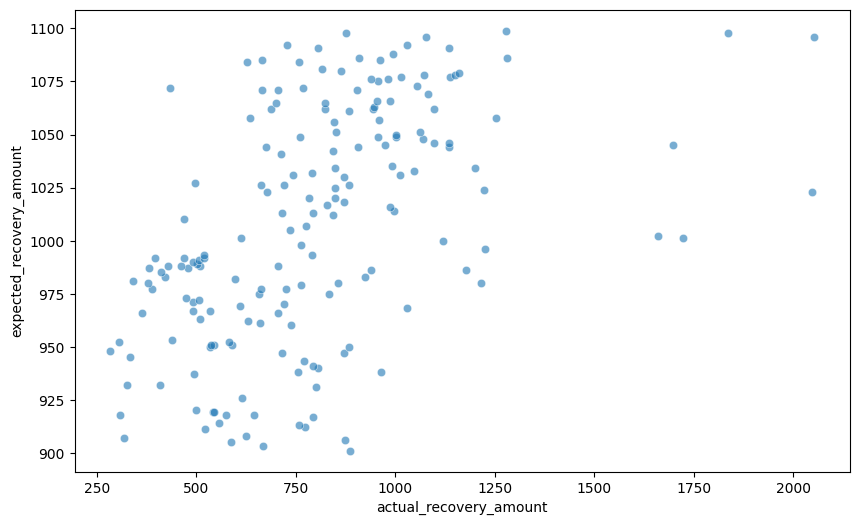

In [48]:
# Filter the data for expected recovery amounts between $900 and $1100
filtered_data = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] < 1100)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_recovery_amount', y='expected_recovery_amount', data=filtered_data, alpha=0.6)

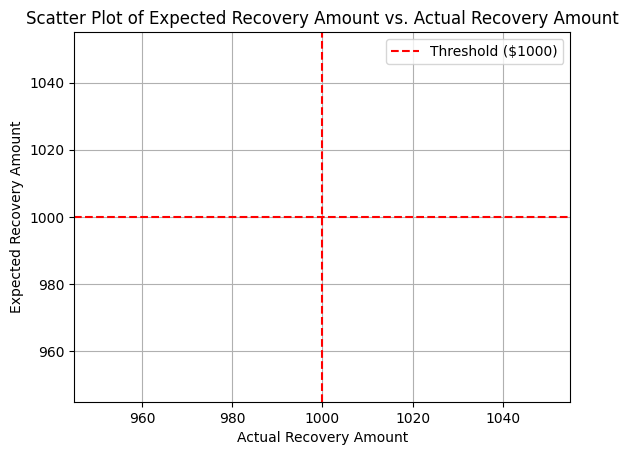

In [49]:
# Add threshold line
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.axhline(y=1000, color='red', linestyle='--')  # Optional: add horizontal threshold line

# Add titles and labels
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##Statistical analysis: recovery amount

In [50]:
# Window 1: Filter for expected recovery amounts between $900 and $1100
filtered_data_window1 = df[(df['expected_recovery_amount'] > 900) & (df['expected_recovery_amount'] < 1100)]
group_below_1000_window1 = filtered_data_window1[filtered_data_window1['expected_recovery_amount'] <= 1000]['actual_recovery_amount']
group_above_1000_window1 = filtered_data_window1[filtered_data_window1['expected_recovery_amount'] > 1000]['actual_recovery_amount']

# Window 2: Filter for expected recovery amounts between $950 and $1050
filtered_data_window2 = df[(df['expected_recovery_amount'] > 950) & (df['expected_recovery_amount'] < 1050)]
group_below_1000_window2 = filtered_data_window2[filtered_data_window2['expected_recovery_amount'] <= 1000]['actual_recovery_amount']
group_above_1000_window2 = filtered_data_window2[filtered_data_window2['expected_recovery_amount'] > 1000]['actual_recovery_amount']

In [51]:
# Perform the Kruskal-Wallis test for Window 1
stat_window1, p_value_window1 = stats.kruskal(group_below_1000_window1, group_above_1000_window1)

# Perform the Kruskal-Wallis test for Window 2
stat_window2, p_value_window2 = stats.kruskal(group_below_1000_window2, group_above_1000_window2)

In [52]:
# Print the results
print(f"Window 1 ($900 - $1100):")
print(f"Kruskal-Wallis statistic: {stat_window1:.4f}, P-value: {p_value_window1:.4f}")

print(f"\nWindow 2 ($950 - $1050):")
print(f"Kruskal-Wallis statistic: {stat_window2:.4f}, P-value: {p_value_window2:.4f}")

# Interpret the results
alpha = 0.05
if p_value_window1 < alpha:
    print("Window 1: Reject the null hypothesis - significant difference in recovery amounts across the threshold.")
else:
    print("Window 1: Fail to reject the null hypothesis - no significant difference in recovery amounts.")

if p_value_window2 < alpha:
    print("Window 2: Reject the null hypothesis - significant difference in recovery amounts across the threshold.")
else:
    print("Window 2: Fail to reject the null hypothesis - no significant difference in recovery amounts.")

Window 1 ($900 - $1100):
Kruskal-Wallis statistic: 62.6545, P-value: 0.0000

Window 2 ($950 - $1050):
Kruskal-Wallis statistic: 30.6488, P-value: 0.0000
Window 1: Reject the null hypothesis - significant difference in recovery amounts across the threshold.
Window 2: Reject the null hypothesis - significant difference in recovery amounts across the threshold.
